<a href="https://colab.research.google.com/github/wlgus9/Machine_Learning/blob/main/2%EC%9E%A5_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
X = [32, 64, 96, 118, 126, 144, 152, 158]
Y = [17, 24, 62, 49, 52, 105, 130, 125]

In [ ]:
import numpy as np

In [ ]:
A = np.c_[X, np.ones(8)]
A

array([[ 32.,   1.],
       [ 64.,   1.],
       [ 96.,   1.],
       [118.,   1.],
       [126.,   1.],
       [144.,   1.],
       [152.,   1.],
       [158.,   1.]])

In [ ]:
B = np.array(Y)
B

array([ 17,  24,  62,  49,  52, 105, 130, 125])

In [ ]:
A.T

array([[ 32.,  64.,  96., 118., 126., 144., 152., 158.],
       [  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.]])

In [ ]:
A.T @ A

array([[1.1294e+05, 8.9000e+02],
       [8.9000e+02, 8.0000e+00]])

In [ ]:
np.linalg.inv(A.T @ A)

array([[ 7.18003949e-05, -7.98779393e-03],
       [-7.98779393e-03,  1.01364208e+00]])

In [ ]:
np.linalg.inv(A.T @ A) @ A.T

array([[-5.69018130e-03, -3.39256866e-03, -1.09495602e-03,
         4.84652666e-04,  1.05905582e-03,  2.35146293e-03,
         2.92586609e-03,  3.35666846e-03],
       [ 7.58032669e-01,  5.02423263e-01,  2.46813857e-01,
         7.10823910e-02,  7.18003949e-03, -1.36600251e-01,
        -2.00502603e-01, -2.48429366e-01]])

In [ ]:
np.linalg.inv(A.T @ A) @ A.T @ B

#array([  0.87962664, -27.35846347]) --> y = 0.8796*X - 27.3585 --> 선형회귀모형
#           weight          bias

array([  0.87962664, -27.35846347])

In [ ]:
from scipy import stats

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y) #linregress() : 선형 최소제곱 회귀 계산
print(f'slope : {slope}')
print(f'intercept : {intercept}')
print(f'r_value : {r_value}')
print(f'p_value : {p_value}')
print(f'std_err : {std_err}')

slope : 0.8796266379465087
intercept : -27.3584634715491
r_value : 0.89008928103186
p_value : 0.003051790677096642
std_err : 0.18388671751663876


In [ ]:
#오차(추정값 - 실제값)의 제곱의 평균에 루트 = RMSE
#rvalue : 결정계수 --> 회귀식이 데이터를 얼마나 설명하는지의 여부, 0~1 사이

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

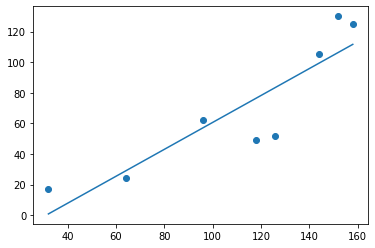

In [ ]:
plt.scatter(X, Y)
plt.plot(X, slope*np.array(X) + intercept, '-')
plt.show()

In [ ]:
# y = a*x**2 + b*x + c
fit = np.polyfit(X, Y, 1)
fit

array([  0.87962664, -27.35846347])

In [ ]:
def func1(x):
    y = fit[0]*x + fit[1]
    return y

In [ ]:
func1(50)

16.6228684257764

In [ ]:
func2 = np.poly1d(fit) #함수로 만들어줌
func2 # --> f(X) = 0.87962664*X -27.35846347

poly1d([  0.87962664, -27.35846347])

In [ ]:
func2(50)

16.6228684257764

In [ ]:
fit2 = np.polyfit(X, Y, 2)
fit_fn2 = np.poly1d(fit2)

poly1d([ 9.01276143e-03, -8.67975467e-01,  3.98246113e+01])

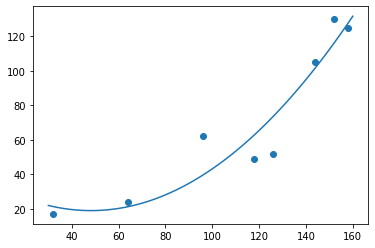

In [ ]:
plt.scatter(X, Y)
sample_X = np.linspace(30, 160, 100)
plt.plot(sample_X, fit_fn2(sample_X))

In [ ]:
def draw_polyfit(X, Y, deg=1):
    import numpy as np
    fit2 = np.polyfit(X, Y, deg)
    print(fit2)
    fit_fn2 = np.poly1d(fit2)
    plt.scatter(X, Y)
    sample_X = np.linspace(min(X), max(X), 100)
    plt.plot(sample_X, fit_fn2(sample_X))
    plt.show()

[ 1.36900759e-04 -3.06581641e-02  2.52476185e+00 -3.87896220e+01]


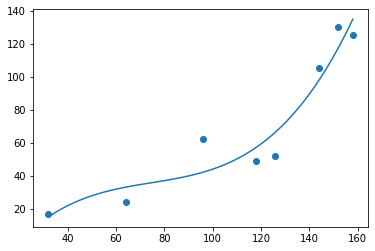

In [ ]:
draw_polyfit(X, Y, 3)

[ 1.99322810e-06 -6.27067834e-04  7.07083835e-02 -2.84352700e+00
  5.30450887e+01]


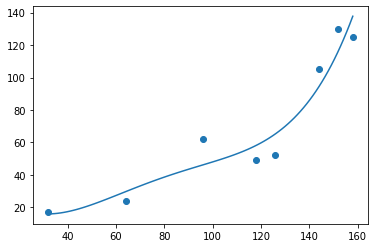

In [ ]:
draw_polyfit(X, Y, 4)

[-3.60679943e-07  1.80553138e-04 -3.41559339e-02  3.01519333e+00
 -1.21436798e+02  1.75743817e+03]


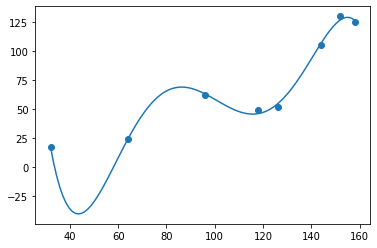

In [ ]:
draw_polyfit(X, Y, 5)

[-6.18327318e-09  3.46694642e-06 -7.70219609e-04  8.62372828e-02
 -5.09766458e+00  1.50398974e+02 -1.70364025e+03]


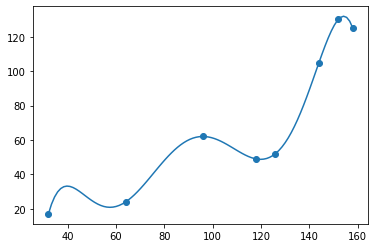

In [ ]:
draw_polyfit(X, Y, 6)

#statsmodels의 정규화 회귀모형

In [ ]:
X = [32, 64, 96, 118, 126, 144, 152, 158]
Y = [17, 24, 62, 49, 52, 105, 130, 125]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(np.c_[X, Y], columns=['x', 'y'])

In [ ]:
from statsmodels.formula.api import ols
model = ols('y ~ x', data=df)
result = model.fit()
result.params

Intercept   -27.358463
x             0.879627
dtype: float64

In [ ]:
n_samples = 30
np.random.seed(0)
X = np.sort(np.random.rand(n_samples))
y = np.sin(2*np.pi * X) + np.random.randn(n_samples)*0.1

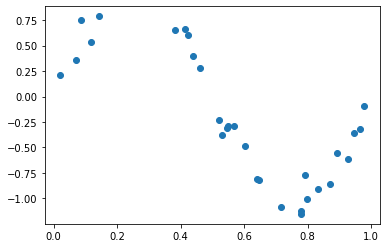

In [ ]:
plt.scatter(X, y)
plt.show()

In [ ]:
df = pd.DataFrame(np.c_[X, y], columns=['x', 'y'])

In [ ]:
from statsmodels.formula.api import ols
model = ols('y ~ x', data=df)
result = model.fit()
result.params

Intercept    0.713959
x           -1.642204
dtype: float64

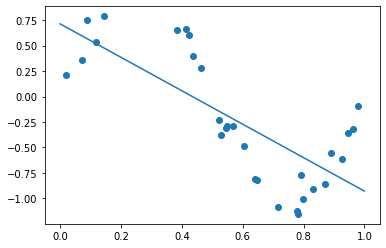

In [ ]:
plt.scatter(X, y)
xx = np.linspace(0, 1, 1000)
plt.plot(xx, result.predict({'x':xx}))
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

#회귀모형 평가함수 (당뇨병 데이터)

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [ ]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [ ]:
lasso = linear_model.Lasso()
model = lasso.fit(train_X, train_y)
model

Lasso()

In [ ]:
pred = model.predict(test_X)
pred[:10]

array([135.94366828, 169.81415232, 119.93634143, 174.51723015,
       176.90090684, 137.17983118, 100.07335275, 212.50721313,
       136.93194012, 157.21292614])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y, pred)

3498.9170193688733

In [ ]:
import math
rmse = math.sqrt(mean_squared_error(test_y, pred))
rmse

59.151644265978554

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, pred)

49.338711280555074

In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(test_y, pred)

0.3753063002492637

In [ ]:
from sklearn.metrics import r2_score
r2_score(test_y, pred)

0.37152745605554083